![netflix_EDA - banner.png](<attachment:netflix_EDA - banner.png>)
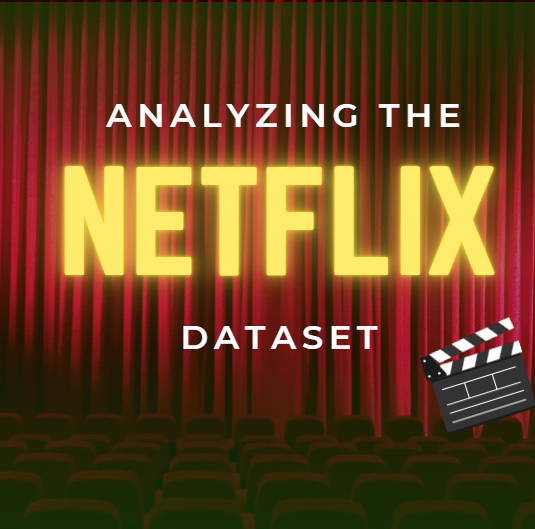

In [2]:
#References : https://github.com/Shyam657/Arxiv-recommendation
# https://www.kaggle.com/code/vineethakkinapalli/sentence-transformer-based-recommender-system#Sentence-Transformer-Based

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px


<h1 style="color:red">Exploring the Data </h1>

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.describe(include='object').T

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In the Directors column:

Exploring the data point with the Highest Frequency, i.e., Rajiv Chilaka

In [7]:
raji_chilaka_group = df.groupby('director').get_group('Rajiv Chilaka')
raji_chilaka_group.head(5)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
406,s407,Movie,Chhota Bheem - Neeli Pahaadi,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,Things get spooky when Bheem and his buddies t...
407,s408,Movie,Chhota Bheem & Ganesh,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2009,TV-Y7,68 min,Children & Family Movies,Bheem and Lord Ganesha join forces to save Dho...
408,s409,Movie,Chhota Bheem & Krishna: Mayanagari,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2011,TV-Y7,67 min,Children & Family Movies,Young lord Krishna has fallen for demoness Maa...
409,s410,Movie,Chhota Bheem & Krishna: Pataliputra- City of t...,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",NaN,"July 22, 2021",2010,TV-Y7,66 min,Children & Family Movies,Krishna needs Bheem’s help: The ruined city of...
410,s411,Movie,Chhota Bheem And The Broken Amulet,Rajiv Chilaka,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"July 22, 2021",2013,TV-Y7,64 min,Children & Family Movies,When a stranger tries to steal an amulet from ...


<h1 style="color:red">Analyzing Content Type</h1>

In [8]:
df['type'].value_counts(normalize=True)*1 

type
Movie      0.696151
TV Show    0.303849
Name: proportion, dtype: float64

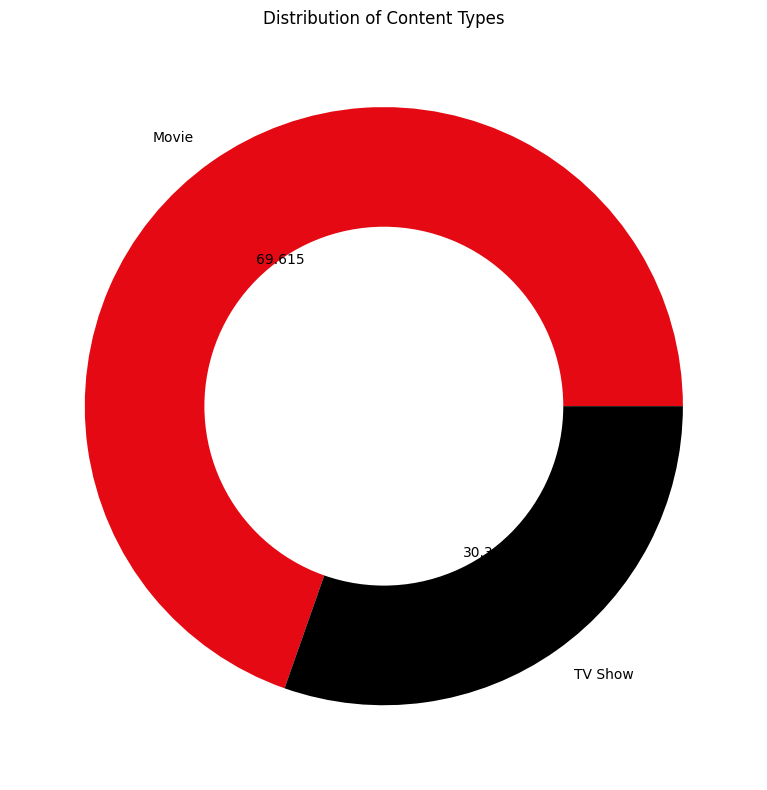

In [9]:


type_counts = df['type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct="%.3f", colors=['#E50914', '#000000'])


plt.title('Distribution of Content Types')

plt.gca().add_artist(plt.Circle((0,0),0.6,fc='white')) 
 # hollow effect

plt.tight_layout()
plt.show()


About 70% of the available content is in Movie Format.

<h1 style="color:red">Analyzing Content Rating</h1>

In [10]:
df['rating'].value_counts(normalize=True)*1 

rating
TV-MA       0.364308
TV-14       0.245371
TV-PG       0.098035
R           0.090765
PG-13       0.055663
TV-Y7       0.037942
TV-Y        0.034874
PG          0.032603
TV-G        0.024991
NR          0.009088
G           0.004658
TV-Y7-FV    0.000682
NC-17       0.000341
UR          0.000341
74 min      0.000114
84 min      0.000114
66 min      0.000114
Name: proportion, dtype: float64

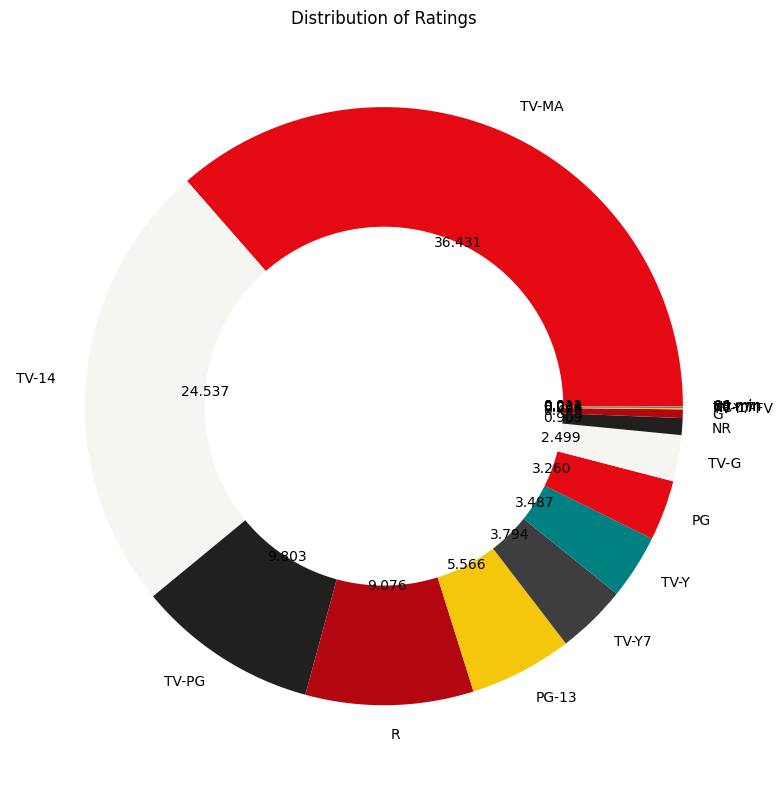

In [11]:

# Extract value counts for the 'rating' column
rating_counts = df['rating'].value_counts()

# Define Netflix colors
netflix_colors = ['#E50914', '#F5F5F1', '#221F1F', '#B20710', '#F4C70C', '#3E3E40', '#008080']

# Plotting the outer pie chart (larger)
plt.figure(figsize=(8, 8))
outer_pie = plt.pie(rating_counts, labels=rating_counts.index, autopct="%.3f", colors=netflix_colors)
plt.title('Distribution of Ratings')

# Plotting the inner pie chart (smaller)
plt.gca().add_artist(plt.Circle((0,0),0.6,fc='white'))  # Add a white circle to create the hollow effect

plt.tight_layout()
plt.show()


Content Rating data is as follows:

TV-MA

TV - 14

TV - PG

<h1 style="color:red">Analyzing Content - Duration Wise</h1>

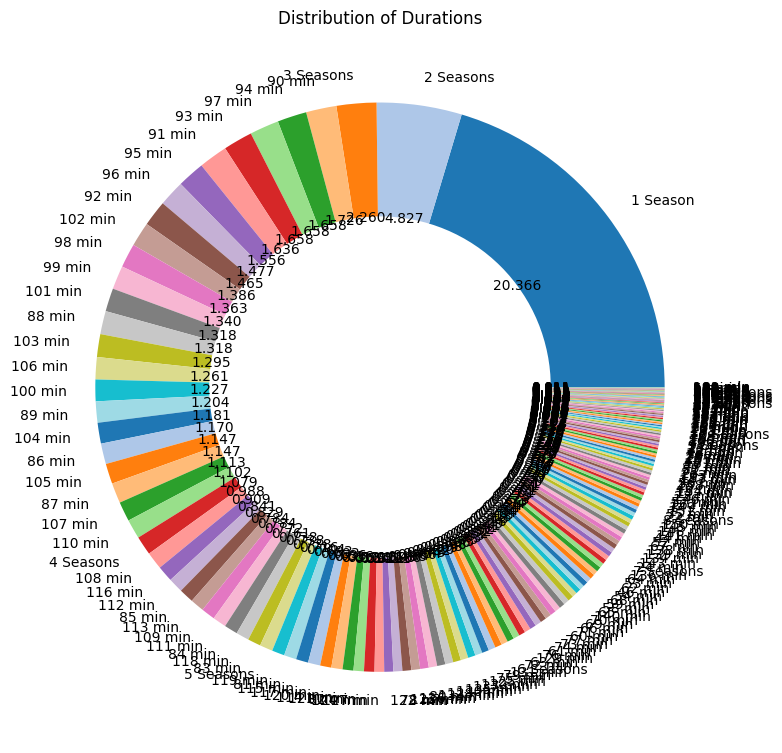

In [12]:


# Extract value counts for the 'duration' column
duration_counts = df['duration'].value_counts()

# Plotting the outer pie chart (larger)
plt.figure(figsize=(8, 8))
outer_pie = plt.pie(duration_counts, labels=duration_counts.index, autopct="%.3f", colors=plt.cm.tab20.colors)
plt.title('Distribution of Durations')

# Plotting the inner pie chart (smaller)
plt.gca().add_artist(plt.Circle((0,0),0.6,fc='white'))  # Add a white circle to create the hollow effect

plt.tight_layout()
plt.show()


Max. content duration is as follows:

Season1

Season 2

Season 3

94 mins

<h4>To Get a better Understanding, lets plot a Violin Plot:</h4>

<p>It has the characteristics of both KDE and Box Plot</p>

In [13]:
# Filter rows where the type is 'Movie'
movie = df[df['type'] == 'Movie']

netflix_colors = ['#E50914', '#F5F5F1', '#221F1F', '#B20710', '#F4C70C', '#3E3E40', '#008080']

# Drop rows with missing values in the 'duration' column and reset index
movie = movie.dropna(subset=['duration']).reset_index(drop=True)

# Extract durations and convert them to integers
movie['duration'] = [int(duration.split(' ')[0]) for duration in movie['duration']]

# Create the violin plot
fig = px.violin(movie, x='duration', box=True, points="all", labels={'duration':'Duration (in mins)'}, color_discrete_sequence=netflix_colors)
fig.show()


The Box Plot values is as follows:

Minima = 47 mins

25% = 87 mins

50%(median) = 98 mins

75% = 113 mins

Maxima = 154 mins

<h1 style="color:red">Analyzing Content - Genre wise</h1>

In [14]:
dd = pd.DataFrame()
dd['listed_in'] = np.hstack([np.array(i.split(', ')) for i in df.listed_in.dropna()])
fig = px.bar(dd.listed_in.value_counts(), labels={'index':'genre', 'value':'movie count'}, orientation='h',  color_discrete_sequence=['brown'])
fig.show()

International Movies have the highest count with 2752 and Classic and Cult TV is the lowest with count = 16

<h1 style="color:red">Top Countries with the Most Content</h1>

In [15]:
df['country'].value_counts()


country
United States                             2818
India                                      972
United Kingdom                             419
Japan                                      245
South Korea                                199
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: count, Length: 748, dtype: int64

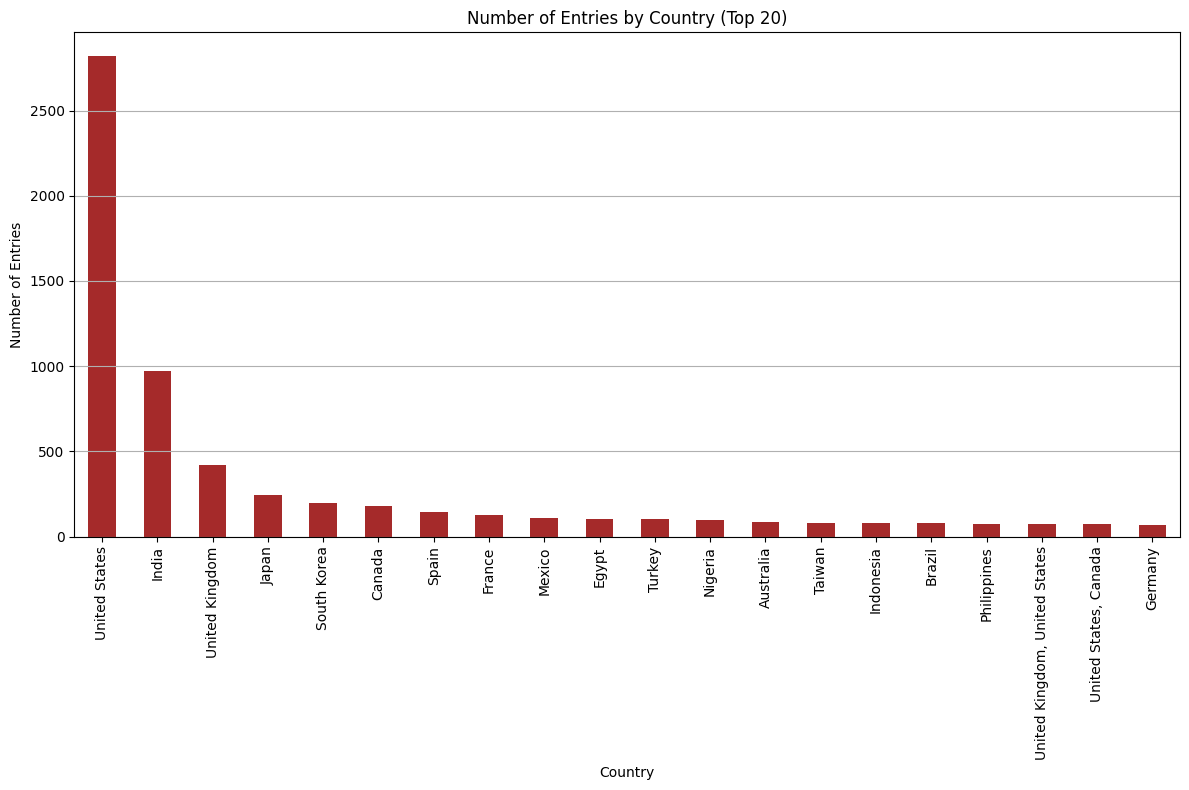

In [16]:
# Extract the top 20 countries by value counts and sort them in descending order
top_countries = df['country'].value_counts().head(20).sort_values(ascending=False)

# Plotting the value counts of the top 20 countries
plt.figure(figsize=(12, 8))
top_countries.plot(kind='bar', color='brown')
plt.title('Number of Entries by Country (Top 20)')
plt.xlabel('Country')
plt.ylabel('Number of Entries')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

<h1 style="color:red"> Directors who have made the Most content in Top Countries <h1>

<h3 style="color:red">Director with the Most Content on Netflix - Countrywise</h3>

In [17]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Iterate over each top country
for country in top_countries:
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    director_count = country_df['director'].value_counts().max()
    

    print(f"For {country}, the director with the highest value count is '{top_director}' with {director_count} entries.")


For United States, the director with the highest value count is 'Marcus Raboy' with 15 entries.
For India, the director with the highest value count is 'David Dhawan' with 9 entries.
For United Kingdom, the director with the highest value count is 'Edward Cotterill' with 4 entries.
For Japan, the director with the highest value count is 'Toshiya Shinohara' with 7 entries.
For South Korea, the director with the highest value count is 'Park Hoon-jung' with 2 entries.


In [18]:
country_df.isna().sum()

show_id           0
type              0
title             0
director        150
cast              3
country           0
date_added        0
release_year      0
rating            0
duration          0
listed_in         0
description       0
dtype: int64

In [19]:
c_df = country_df.dropna()
c_df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [20]:
c_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
556,s557,Movie,The 8th Night,Kim Tae-hyung,"Lee Sung-min, Park Hae-joon, Kim You-jung, Nam...",South Korea,"July 2, 2021",2021,TV-14,116 min,"Horror Movies, International Movies, Thrillers",With prayer beads in one hand and an ax in the...
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...
1085,s1086,Movie,Night in Paradise,Park Hoon-jung,"Um Tae-goo, Jeon Yeo-been, Cha Seoung-won, Lee...",South Korea,"April 9, 2021",2021,TV-MA,132 min,"Dramas, International Movies",Hiding out in Jeju Island following a brutal t...
1173,s1174,TV Show,Men on a Mission,Jung-ah Im,"Ho-dong Kang, Soo-geun Lee, Sang-min Lee, Youn...",South Korea,"March 23, 2021",2021,TV-14,6 Seasons,"International TV Shows, Korean TV Shows, Stand...",Male celebs play make-believe as high schooler...
1342,s1343,Movie,Space Sweepers,Jo Sung-hee,"Song Joong-ki, Kim Tae-ri, Jin Sun-kyu, Yoo Ha...",South Korea,"February 5, 2021",2021,TV-MA,138 min,"Action & Adventure, Dramas, International Movies",Chasing after space debris and faraway dreams ...


<h5 style="color:red"> As trends vary country-wise, we will be now analyzing data for country-wise. <h5>

<h3 style="color:red">Creating a dataframe for Directors with the Most Content in the Top Countries</h3>

In [21]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Initialize an empty list to collect data
data = []

# Iterate over each top country
for country in top_countries:
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    
    # Calculate value counts of directors for the current country
    director_counts = country_df['director'].value_counts().head(10)
    
    # Convert director counts series to a dictionary
    director_counts_dict = director_counts.to_dict()
    
    # Append the data for the current country to the list
    data.append({'country': country, 'top_director': top_director, 'director_counts': director_counts_dict})

# Create a DataFrame from the collected data
result_df = pd.DataFrame(data)

# Print the DataFrame
result_df


,country,top_director,director_counts
0,United States,Marcus Raboy,"{'Marcus Raboy': 15, 'Jay Karas': 14, 'Jay Cha..."
1,India,David Dhawan,"{'David Dhawan': 9, 'Ram Gopal Varma': 7, 'Imt..."
2,United Kingdom,Edward Cotterill,"{'Edward Cotterill': 4, 'Blair Simmons': 2, 'B..."
3,Japan,Toshiya Shinohara,"{'Toshiya Shinohara': 7, 'Masahiko Murata': 4,..."
4,South Korea,Park Hoon-jung,"{'Park Hoon-jung': 2, 'Sang-ho Yeon': 2, 'Shin..."


In [22]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Initialize empty lists to collect data
country_list = []
director_list = []
count_list = []

# Iterate over each top country
for country in top_countries:
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    
    # Calculate value counts of directors for the current country
    director_counts = country_df['director'].value_counts().head(10)
    
    # Append the country name and top director to the country list
    country_list.extend([country] * len(director_counts)) #prints top 10
    
    # Append the director names to the director list
    director_list.extend(director_counts.index.tolist())
    
    # Append the director counts to the count list
    count_list.extend(director_counts.values.tolist())

# Create a DataFrame from the collected lists
result_df = pd.DataFrame({'country': country_list, 'director': director_list, 'director_count': count_list})

# Print the DataFrame
print(result_df)


           country                         director  director_count
0    United States                     Marcus Raboy              15
1    United States                        Jay Karas              14
2    United States                      Jay Chapman              12
3    United States                      Troy Miller               8
4    United States                      Ryan Polito               8
5    United States                  Shannon Hartman               8
6    United States                  Martin Scorsese               8
7    United States                      Lance Bangs               7
8    United States                 Steven Spielberg               6
9    United States                 Robert Rodriguez               6
10           India                     David Dhawan               9
11           India                  Ram Gopal Varma               7
12           India                       Imtiaz Ali               6
13           India               Sooraj R. Barja

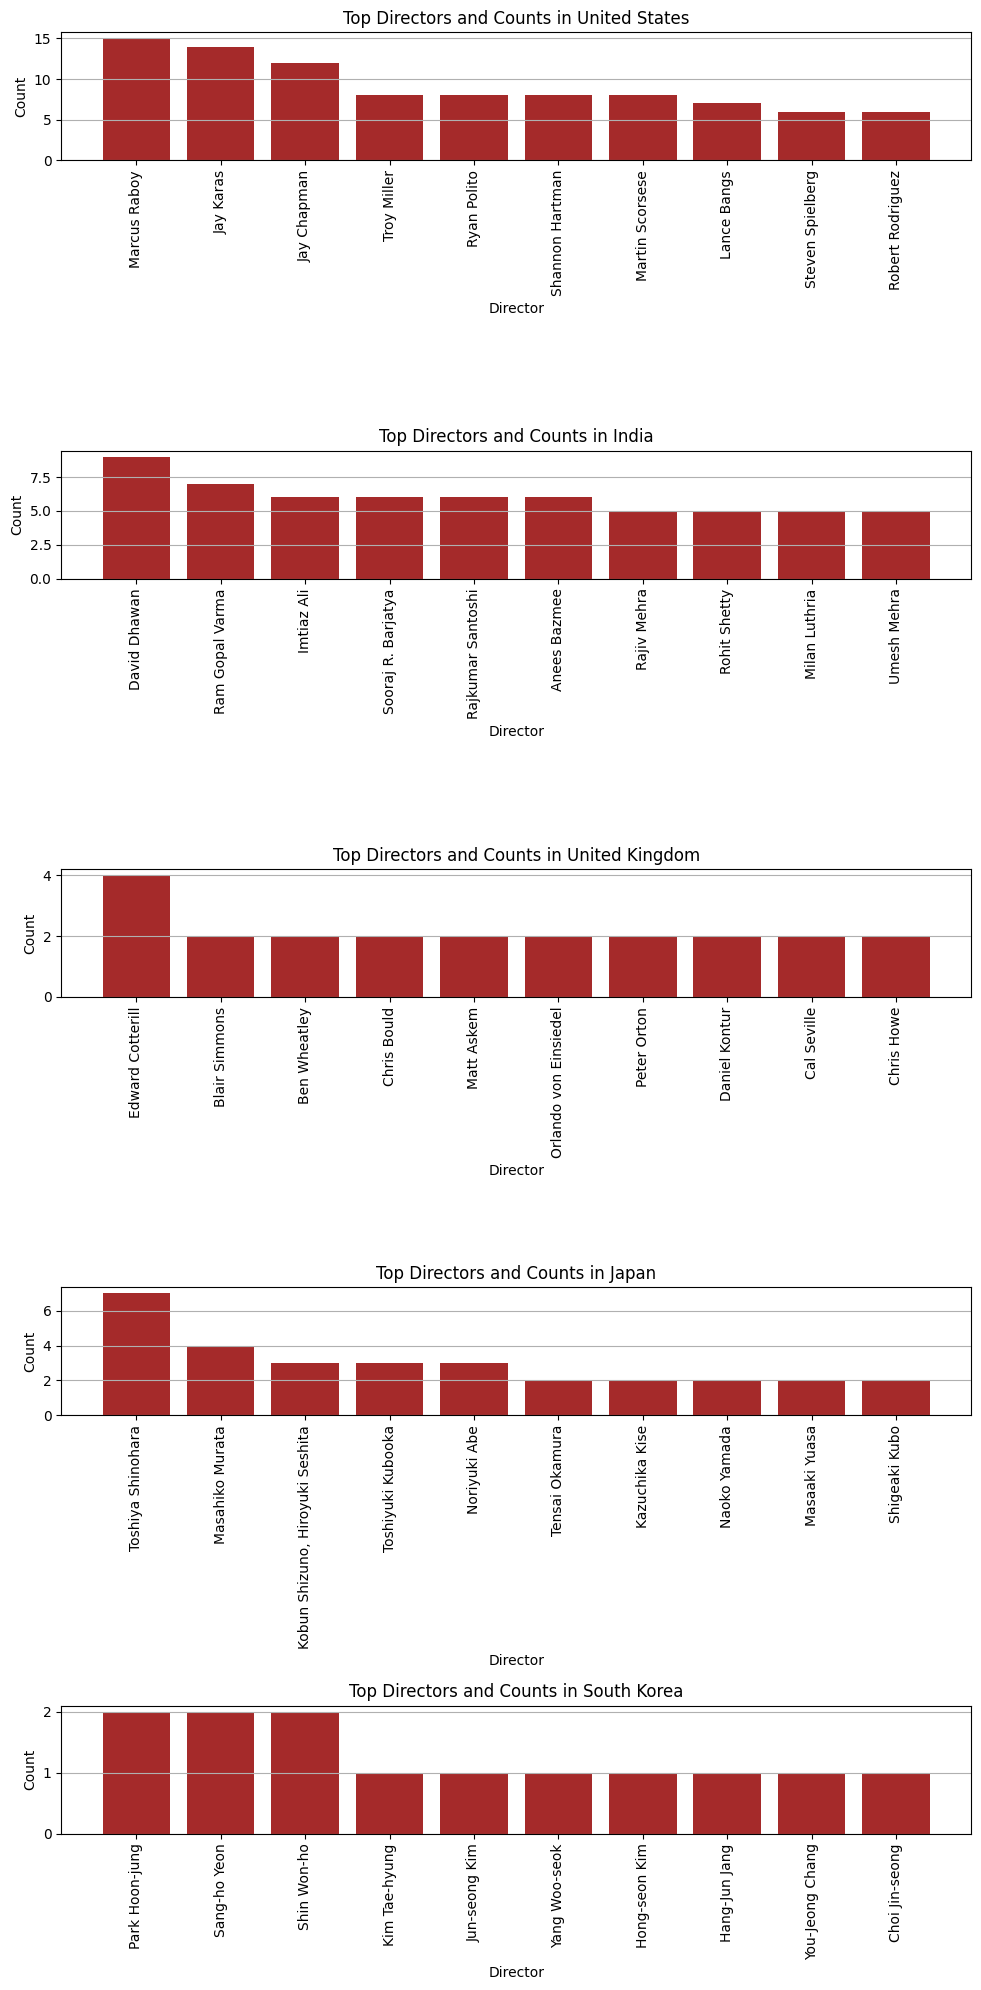

In [23]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Initialize a figure and axis
fig, ax = plt.subplots(len(top_countries), figsize=(10, 20))

# Iterate over each top country
for i, country in enumerate(top_countries):
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    
    # Calculate value counts of directors for the current country
    director_counts = country_df['director'].value_counts().head(10)
    
    # Plot the bar chart for top directors and their counts
    ax[i].bar(director_counts.index, director_counts.values, color='brown')
    ax[i].set_title(f"Top Directors and Counts in {country}")
    ax[i].set_xlabel('Director')
    ax[i].set_ylabel('Count')
    ax[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability
    ax[i].grid(axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<h3 style="color:red">Plotting Content Rating for Each Director (Country - Wise) </h3>

In [24]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Iterate over each top country
for country in top_countries:
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    director_count = country_df['director'].value_counts().max()
    
    # Filter the DataFrame to include only entries corresponding to the top director
    director_df = country_df[country_df['director'] == top_director]
    
    # Extract the ratings for the top director
    director_ratings = director_df['rating'].value_counts()
    
    # Print the result
    print(country, top_director, director_ratings)


United States Marcus Raboy rating
TV-MA    12
TV-14     3
Name: count, dtype: int64
India David Dhawan rating
TV-14    6
TV-PG    3
Name: count, dtype: int64
United Kingdom Edward Cotterill rating
TV-PG    4
Name: count, dtype: int64
Japan Toshiya Shinohara rating
TV-14    4
TV-PG    3
Name: count, dtype: int64
South Korea Park Hoon-jung rating
TV-MA    2
Name: count, dtype: int64


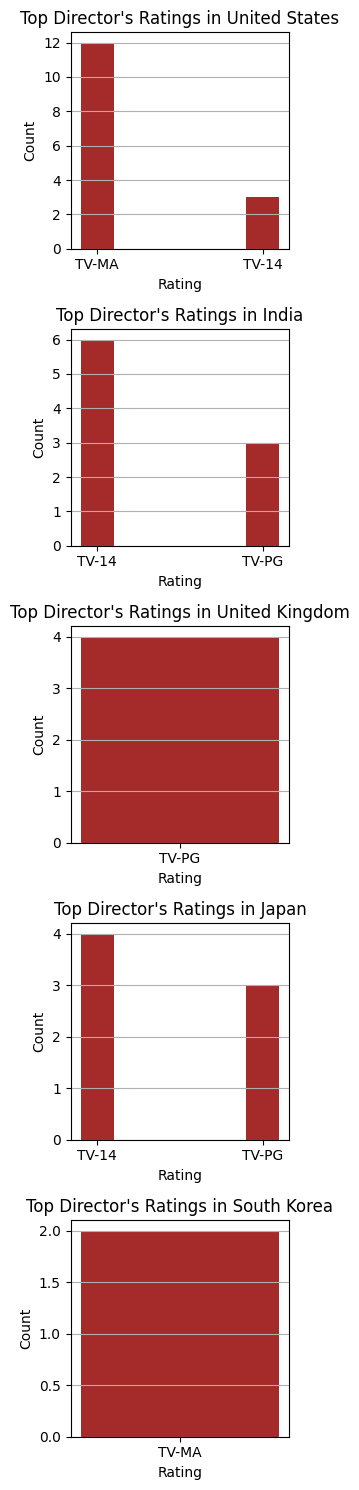

In [25]:
# Find the top 5 countries by the number of entries
top_countries = df['country'].value_counts().head(5).index.tolist()

# Initialize a figure and axis
fig, ax = plt.subplots(len(top_countries), figsize=(3, 15))

# Iterate over each top country
for i, country in enumerate(top_countries):
    # Filter the DataFrame for the current country
    country_df = df[df['country'] == country]
    
    # Find the director with the highest value count in the current country
    top_director = country_df['director'].value_counts().idxmax()
    
    # Filter the DataFrame to include only entries corresponding to the top director
    director_df = country_df[country_df['director'] == top_director]
    
    # Extract the ratings for the top director
    director_ratings = director_df['rating'].value_counts()
    
    # Plot the bar chart for ratings with adjusted width and red color
    ax[i].bar(director_ratings.index, director_ratings.values, color='brown', width=0.2)
    ax[i].set_title(f"Top Director's Ratings in {country}")
    ax[i].set_xlabel('Rating')
    ax[i].set_ylabel('Count')
    ax[i].grid(axis='y')

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Checking the Director and Cast Pair

## Finding Nested Columns

In [26]:
cols = df.select_dtypes('object').columns.tolist()

for col in cols:
    if np.any(df[col].str.contains(',', na=False)):
        print(col)
    

title
director
cast
country
date_added
listed_in
description


In [27]:
df['director'].nunique()

4528

<h1 style="color:red">Finding the Most Frequent Actor - Director Pair</h1>

## UN-NESTING Director

In [28]:
constraint = c_df['director'].str.split(',')

print(constraint.iloc[0])  # Access the first element of the Series of lists
print(constraint)


['Kim Tae-hyung']
556                                       [Kim Tae-hyung]
762                                       [Lee Kae-byeok]
1085                                     [Park Hoon-jung]
1173                                         [Jung-ah Im]
1342                                        [Jo Sung-hee]
1412                                        [Sung Do-jun]
1468                                       [Kim Dong-kyu]
1643                                     [Lee Chung-hyun]
2036                                             [Cho Il]
2108                                        [Hong Won-ki]
2215                                    [Ahn Byoung-wook]
2410                                     [Park Hoon-jung]
2650                                     [Yoon Sung-hyun]
3308                                        [Jung Ji-woo]
3358                                      [Park Joon-hwa]
3419                                      [Kim Joo-hyung]
3461                                      [Lee Yoon-ju

In [29]:
df_wide=pd.DataFrame(constraint,index=c_df['director'])
df_wide

,director
director,
Kim Tae-hyung,NaN
Lee Kae-byeok,NaN
Park Hoon-jung,NaN
Jung-ah Im,NaN
Jo Sung-hee,NaN
Sung Do-jun,NaN
Kim Dong-kyu,NaN
Lee Chung-hyun,NaN
Cho Il,NaN


## UN-NESTING   Cast

In [30]:
aString = 'none' 
[aString]

['none']

In [31]:

# Split the 'cast' column by comma
constraint = c_df['cast'].str.split(',')

# Replace missing values with 'Missing'
constraint.fillna('Missing', inplace=True)

# Apply a lambda function to handle 'Missing' values
constraint = constraint.apply(lambda x: ['Missing'] if isinstance(x, str) and x == 'Missing' else x)

# Now print the first entry and the entire Series
print(constraint.iloc[0])  # Use iloc[0] to access the first element
print(constraint)


['Lee Sung-min', ' Park Hae-joon', ' Kim You-jung', ' Nam Da-reum', ' Choi Jin-ho', ' Kim Dong-yeong', ' Lee Eal']
556     [Lee Sung-min,  Park Hae-joon,  Kim You-jung, ...
762         [Jang Ki-yong,  Chae Soo-bin,  Jung Soo-jung]
1085    [Um Tae-goo,  Jeon Yeo-been,  Cha Seoung-won, ...
1173    [Ho-dong Kang,  Soo-geun Lee,  Sang-min Lee,  ...
1342    [Song Joong-ki,  Kim Tae-ri,  Jin Sun-kyu,  Yo...
1412                   [Kang In-soo,  Lee Sang,  Soo-bin]
1468         [Cha In-pyo,  Cho Dal-hwan,  Song Jae-ryong]
1643    [Park Shin-hye,  Jun Jong-seo,  Kim Sung-ryoun...
2036                          [Yoo Ah-in,  Park Shin-hye]
2108    [SEOLA,  Lee Hyun-joo,  Song Chae-yun,  Han Ga...
2215    [Hong Bum-ki,  Eddy Lee,  Kang Shi-hyun,  Ahn ...
2410    [Kim Da-mi,  Cho Min-soo,  Choi Woo-shik,  Par...
2650    [Lee Je-hoon,  Ahn Jae-hong,  Choi Woo-shik,  ...
3308    [Kim Go-eun,  Jung Hae-in,  Park Hae-joon,  Ki...
3358    [Taecyeon,  Kim So-hyun,  Kwon Yul,  Kim Sang-...
3419           

In [32]:
constraint=constraint.tolist()
constraint

[['Lee Sung-min',
  ' Park Hae-joon',
  ' Kim You-jung',
  ' Nam Da-reum',
  ' Choi Jin-ho',
  ' Kim Dong-yeong',
  ' Lee Eal'],
 ['Jang Ki-yong', ' Chae Soo-bin', ' Jung Soo-jung'],
 ['Um Tae-goo',
  ' Jeon Yeo-been',
  ' Cha Seoung-won',
  ' Lee Ki-young',
  ' Park Ho-san'],
 ['Ho-dong Kang',
  ' Soo-geun Lee',
  ' Sang-min Lee',
  ' Young-chul Kim',
  ' Jang-hoon Seo',
  ' Hee-chul Kim',
  ' Kyung-hoon Min'],
 ['Song Joong-ki',
  ' Kim Tae-ri',
  ' Jin Sun-kyu',
  ' Yoo Hai-jin',
  ' Richard Armitage',
  ' Park Ye-rin'],
 ['Kang In-soo', ' Lee Sang', ' Soo-bin'],
 ['Cha In-pyo', ' Cho Dal-hwan', ' Song Jae-ryong'],
 ['Park Shin-hye',
  ' Jun Jong-seo',
  ' Kim Sung-ryoung',
  ' EL',
  ' Park Ho-san',
  ' Oh Jung-se',
  ' Lee Dong-hwi',
  ' Um Chae-young'],
 ['Yoo Ah-in', ' Park Shin-hye'],
 ['SEOLA', ' Lee Hyun-joo', ' Song Chae-yun', ' Han Ga-rim', ' Shim So-young'],
 ['Hong Bum-ki',
  ' Eddy Lee',
  ' Kang Shi-hyun',
  ' Ahn Hyo-min',
  ' Kim Yeon-woo',
  ' Choi Nak-yoon',
  ' Tom

In [33]:
df_wide=pd.DataFrame(constraint,index=c_df['director'])
df_wide

,0,1,2,3,4,5,6,7,8,9,10
director,,,,,,,,,,,
Kim Tae-hyung,Lee Sung-min,Park Hae-joon,Kim You-jung,Nam Da-reum,Choi Jin-ho,Kim Dong-yeong,Lee Eal,None,None,None,None
Lee Kae-byeok,Jang Ki-yong,Chae Soo-bin,Jung Soo-jung,None,None,None,None,None,None,None,None
Park Hoon-jung,Um Tae-goo,Jeon Yeo-been,Cha Seoung-won,Lee Ki-young,Park Ho-san,None,None,None,None,None,None
Jung-ah Im,Ho-dong Kang,Soo-geun Lee,Sang-min Lee,Young-chul Kim,Jang-hoon Seo,Hee-chul Kim,Kyung-hoon Min,None,None,None,None
Jo Sung-hee,Song Joong-ki,Kim Tae-ri,Jin Sun-kyu,Yoo Hai-jin,Richard Armitage,Park Ye-rin,None,None,None,None,None
Sung Do-jun,Kang In-soo,Lee Sang,Soo-bin,None,None,None,None,None,None,None,None
Kim Dong-kyu,Cha In-pyo,Cho Dal-hwan,Song Jae-ryong,None,None,None,None,None,None,None,None
Lee Chung-hyun,Park Shin-hye,Jun Jong-seo,Kim Sung-ryoung,EL,Park Ho-san,Oh Jung-se,Lee Dong-hwi,Um Chae-young,None,None,None
Cho Il,Yoo Ah-in,Park Shin-hye,None,None,None,None,None,None,None,None,None


In [34]:
df_wide=pd.DataFrame(constraint,index=c_df['director'])
df_wide

,0,1,2,3,4,5,6,7,8,9,10
director,,,,,,,,,,,
Kim Tae-hyung,Lee Sung-min,Park Hae-joon,Kim You-jung,Nam Da-reum,Choi Jin-ho,Kim Dong-yeong,Lee Eal,None,None,None,None
Lee Kae-byeok,Jang Ki-yong,Chae Soo-bin,Jung Soo-jung,None,None,None,None,None,None,None,None
Park Hoon-jung,Um Tae-goo,Jeon Yeo-been,Cha Seoung-won,Lee Ki-young,Park Ho-san,None,None,None,None,None,None
Jung-ah Im,Ho-dong Kang,Soo-geun Lee,Sang-min Lee,Young-chul Kim,Jang-hoon Seo,Hee-chul Kim,Kyung-hoon Min,None,None,None,None
Jo Sung-hee,Song Joong-ki,Kim Tae-ri,Jin Sun-kyu,Yoo Hai-jin,Richard Armitage,Park Ye-rin,None,None,None,None,None
Sung Do-jun,Kang In-soo,Lee Sang,Soo-bin,None,None,None,None,None,None,None,None
Kim Dong-kyu,Cha In-pyo,Cho Dal-hwan,Song Jae-ryong,None,None,None,None,None,None,None,None
Lee Chung-hyun,Park Shin-hye,Jun Jong-seo,Kim Sung-ryoung,EL,Park Ho-san,Oh Jung-se,Lee Dong-hwi,Um Chae-young,None,None,None
Cho Il,Yoo Ah-in,Park Shin-hye,None,None,None,None,None,None,None,None,None


In [35]:
df_wide = df_wide.reset_index()
df_wide

,director,0,1,2,3,4,5,6,7,8,9,10
0,Kim Tae-hyung,Lee Sung-min,Park Hae-joon,Kim You-jung,Nam Da-reum,Choi Jin-ho,Kim Dong-yeong,Lee Eal,None,None,None,None
1,Lee Kae-byeok,Jang Ki-yong,Chae Soo-bin,Jung Soo-jung,None,None,None,None,None,None,None,None
2,Park Hoon-jung,Um Tae-goo,Jeon Yeo-been,Cha Seoung-won,Lee Ki-young,Park Ho-san,None,None,None,None,None,None
3,Jung-ah Im,Ho-dong Kang,Soo-geun Lee,Sang-min Lee,Young-chul Kim,Jang-hoon Seo,Hee-chul Kim,Kyung-hoon Min,None,None,None,None
4,Jo Sung-hee,Song Joong-ki,Kim Tae-ri,Jin Sun-kyu,Yoo Hai-jin,Richard Armitage,Park Ye-rin,None,None,None,None,None
5,Sung Do-jun,Kang In-soo,Lee Sang,Soo-bin,None,None,None,None,None,None,None,None
6,Kim Dong-kyu,Cha In-pyo,Cho Dal-hwan,Song Jae-ryong,None,None,None,None,None,None,None,None
7,Lee Chung-hyun,Park Shin-hye,Jun Jong-seo,Kim Sung-ryoung,EL,Park Ho-san,Oh Jung-se,Lee Dong-hwi,Um Chae-young,None,None,None
8,Cho Il,Yoo Ah-in,Park Shin-hye,None,None,None,None,None,None,None,None,None
9,Hong Won-ki,SEOLA,Lee Hyun-joo,Song Chae-yun,Han Ga-rim,Shim So-young,None,None,None,None,None,None


In [36]:
df_melt=pd.melt(df_wide ,id_vars=['director'])
# df_melt.set_index('title', inplace=True)
df_melt

,director,variable,value
0,Kim Tae-hyung,0,Lee Sung-min
1,Lee Kae-byeok,0,Jang Ki-yong
2,Park Hoon-jung,0,Um Tae-goo
3,Jung-ah Im,0,Ho-dong Kang
4,Jo Sung-hee,0,Song Joong-ki
...,...,...,...
523,Jee-woon Kim,10,None
524,Park In-je,10,None
525,Chan-sang Lim,10,None
526,Na Hyeon,10,None


In [37]:
df_melt = df_melt[['director','value']]
df_melt.columns=['director','cast']
df_melt

,director,cast
0,Kim Tae-hyung,Lee Sung-min
1,Lee Kae-byeok,Jang Ki-yong
2,Park Hoon-jung,Um Tae-goo
3,Jung-ah Im,Ho-dong Kang
4,Jo Sung-hee,Song Joong-ki
...,...,...
523,Jee-woon Kim,None
524,Park In-je,None
525,Chan-sang Lim,None
526,Na Hyeon,None


In [38]:
df_melt['cast'].value_counts()

cast
Kyeong-yeong Lee    4
Do-won Kwak         3
Park Hae-joon       3
Eui-sung Kim        3
Dal-su Oh           3
                   ..
Ha-Nui Lee          1
Soo-bin Bae         1
Min-jung Kim        1
Yu-chun Park        1
Byeong-eun Park     1
Name: count, Length: 299, dtype: int64

In [39]:
df_melt.groupby('director')['cast'].aggregate('count').reset_index().sort_values(by = 'director', ascending = False)[:25]

,director,cast
44,You-Jeong Chang,8
43,Yoon Sung-hyun,5
42,Yang Woo-seok,8
41,Y. Joon Chung,1
40,Woo Min-ho,9
39,Ui-seok Jo,7
38,Sung-soo Kim,4
37,Sung Do-jun,3
36,Shin-yeon Won,10
35,Shin Won-ho,18


<h1 style="color:red">Actor with the Most Content</h1>

In [ ]:
df_melt.groupby('cast')['title'].aggregate('count').reset_index().sort_values(by = 'title', ascending = False)[:5]

,cast,title
37423,Missing,825
2612,Anupam Kher,39
26941,Rupa Bhimani,31
30303,Takahiro Sakurai,30
15541,Julie Tejwani,28


In [ ]:
df_melt.groupby('cast')['title'].get_group('Anupam Kher').reset_index()

,index,title
0,2564,One Day: Justice Delivered
1,6063,A Wednesday
2,7186,Khosla Ka Ghosla
3,8769,Y.M.I.: Yeh Mera India


In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:

df_melt[df_melt['title']=='Blood & Water']

,title,cast
1,Blood & Water,Ama Qamata
8808,Blood & Water,Khosi Ngema
17615,Blood & Water,Gail Mabalane
26422,Blood & Water,Thabang Molaba
35229,Blood & Water,Dillon Windvogel
44036,Blood & Water,Natasha Thahane
52843,Blood & Water,Arno Greeff
61650,Blood & Water,Xolile Tshabalala
70457,Blood & Water,Getmore Sithole
79264,Blood & Water,Cindy Mahlangu


In [ ]:

# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')

# Extract year and month
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Display the updated DataFrame
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,9.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,9.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,9.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,9.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,9.0


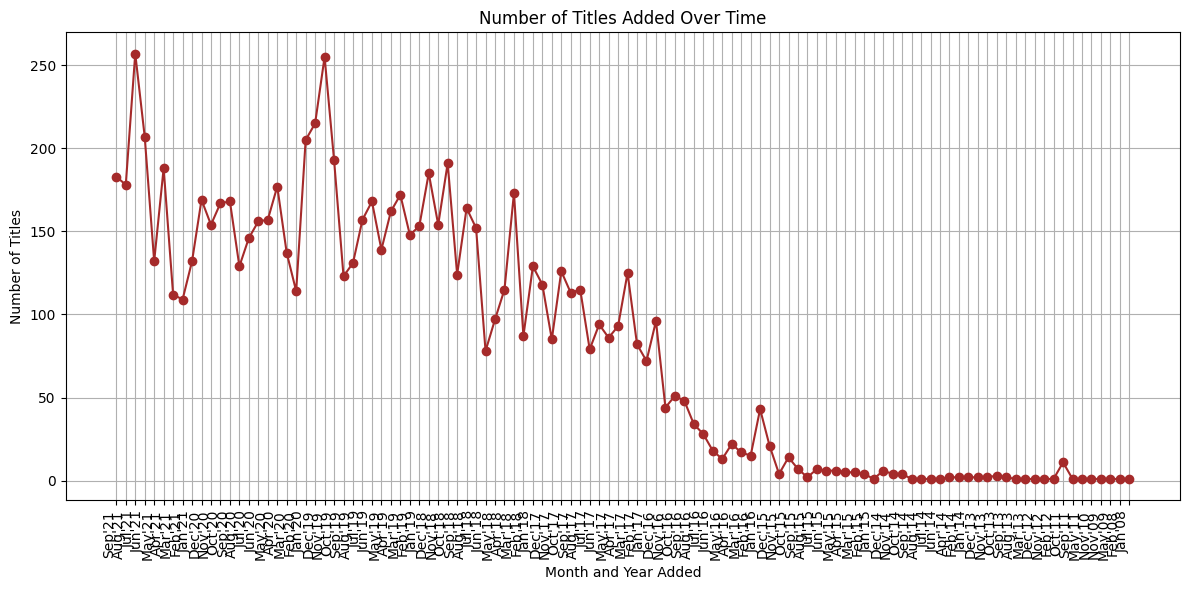

In [ ]:
# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month from the 'date_added' column
df['year_added'] = df['date_added'].dt.year.astype(int)
df['month_added'] = df['date_added'].dt.month.astype(int)

# Group by year and month
date_added_trends = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Sort the DataFrame by year_added and month_added in descending order
date_added_trends_sorted = date_added_trends.sort_values(by=['year_added', 'month_added'], ascending=False)

# Format month and year to display in the format "Jun'22"
date_added_trends_sorted['month_year'] = date_added_trends_sorted.apply(lambda row: pd.Timestamp(year=row['year_added'], month=row['month_added'], day=1).strftime('%b') + "'" + str(row['year_added'])[2:], axis=1)

# Plot the sorted data with a different line style and marker style
plt.figure(figsize=(12, 6))  # Adjust figure size
plt.plot(date_added_trends_sorted['month_year'], date_added_trends_sorted['count'], marker='o', linestyle='-', color='brown')  # Specify line style and marker style

plt.title('Number of Titles Added Over Time')
plt.xlabel('Month and Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


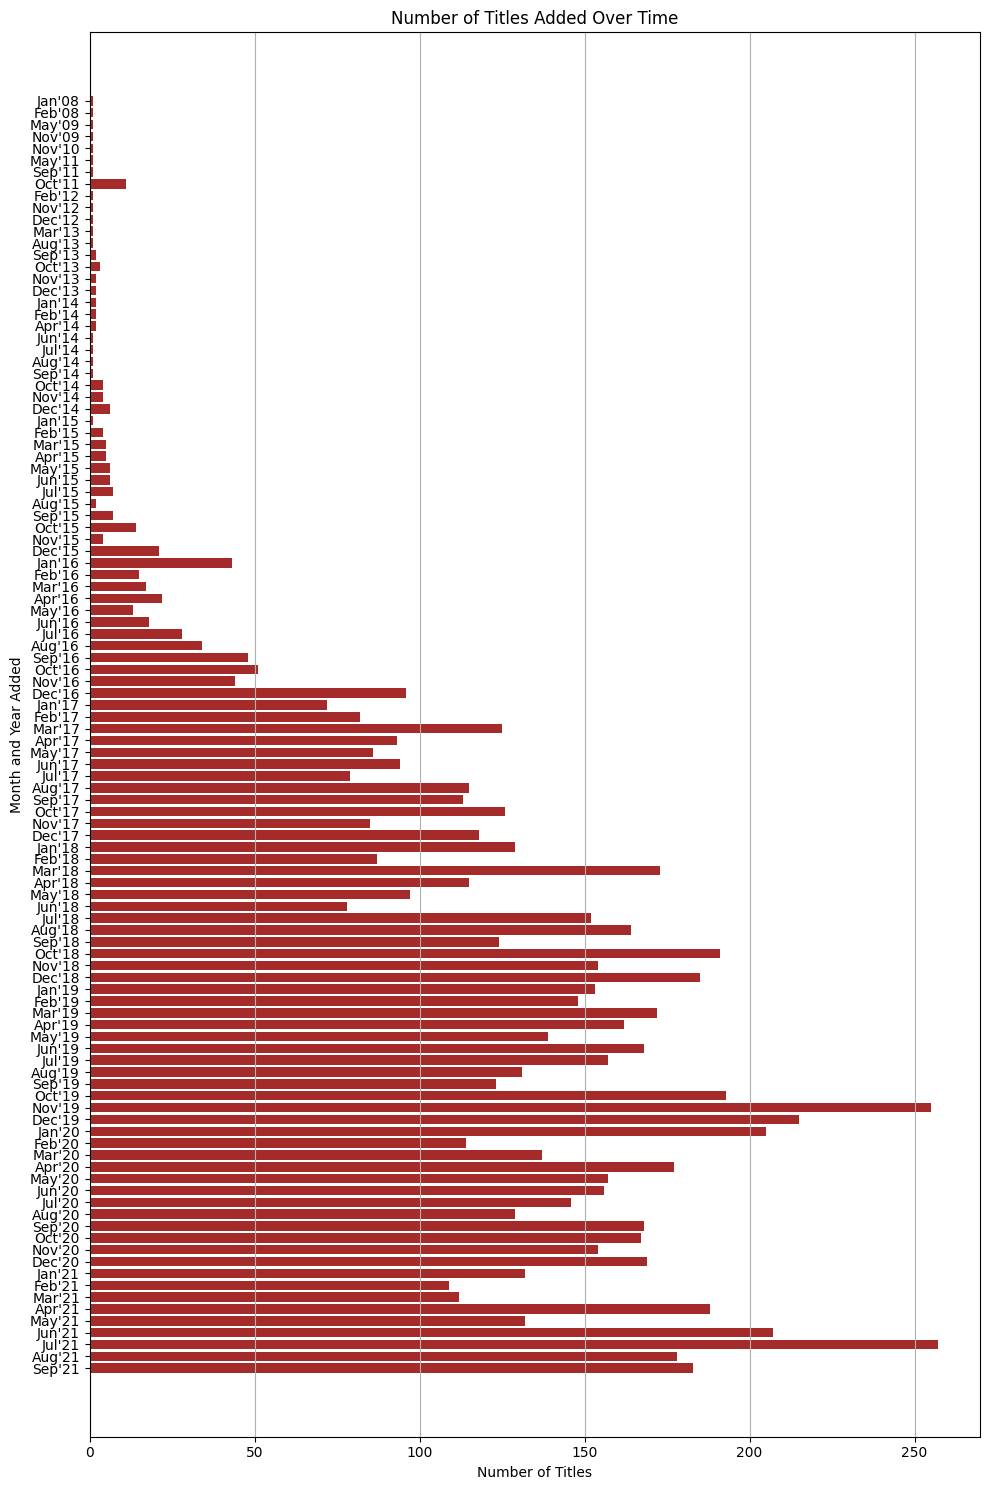

In [ ]:

# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month from the 'date_added' column
df['year_added'] = df['date_added'].dt.year.astype(int)
df['month_added'] = df['date_added'].dt.month.astype(int)

# Group by year and month
date_added_trends = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Sort the DataFrame by year_added and month_added in descending order
date_added_trends_sorted = date_added_trends.sort_values(by=['year_added', 'month_added'], ascending=False)

# Format month and year to display in the format "Jun'22"
date_added_trends_sorted['month_year'] = date_added_trends_sorted.apply(lambda row: pd.Timestamp(year=row['year_added'], month=row['month_added'], day=1).strftime('%b') + "'" + str(row['year_added'])[2:], axis=1)

# Plot the sorted data horizontally as a bar plot
plt.figure(figsize=(10, 15))  # Adjust figure size
plt.barh(date_added_trends_sorted['month_year'], date_added_trends_sorted['count'], color='brown')  # Use barh for horizontal bar plot

plt.title('Number of Titles Added Over Time')
plt.xlabel('Number of Titles')
plt.ylabel('Month and Year Added')
plt.grid(axis='x')  # Show grid only on x-axis
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Most Content was added in the last quarter of 2019 and 2021.

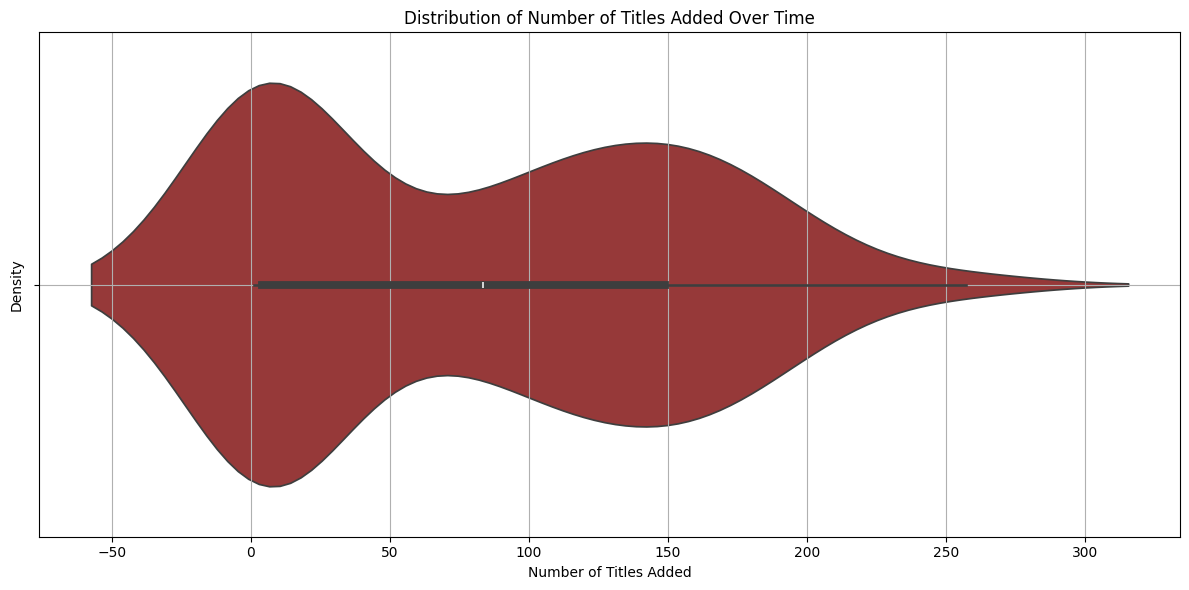

In [ ]:

# Convert 'date_added' column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

# Extract year and month from the 'date_added' column
df['year_added'] = df['date_added'].dt.year.astype(int)
df['month_added'] = df['date_added'].dt.month.astype(int)

# Group by year and month
date_added_trends = df.groupby(['year_added', 'month_added']).size().reset_index(name='count')

# Sort the DataFrame by year_added and month_added in descending order
date_added_trends_sorted = date_added_trends.sort_values(by=['year_added', 'month_added'], ascending=False)

# Format month and year to display in the format "Jun'22"
date_added_trends_sorted['month_year'] = date_added_trends_sorted.apply(lambda row: pd.Timestamp(year=row['year_added'], month=row['month_added'], day=1).strftime('%b') + "'" + str(row['year_added'])[2:], axis=1)

# Plot violin plot
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.violinplot(data=date_added_trends_sorted, x='count', color='brown')

plt.title('Distribution of Number of Titles Added Over Time')
plt.xlabel('Number of Titles Added')
plt.ylabel('Density')
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


In [ ]:
#line chart mein 3 maheene ka group by laga krke line chart represent kro
#no. ki jagah date plot kro violin chart mein